In [1]:
from time import time
import psycopg2
from collections import Counter
import gc
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import classification_report
np.set_printoptions(suppress=True,precision=10)

In [2]:
import sys 
import os
sys.path.append(os.path.abspath("/home/scidb/HeartRatePatterns/Python"))
from LogisticRegresion import ajustLogisticRegression
from Matrix import convert_matrix
from NMF import generateNMF,auc_model,find_best_NMF

In [3]:
t0=time()
table = convert_matrix()
#sortColumns =['abbac','adadd']
#table = table.sort_values(sortColumns, ascending=False)
print("converMatrix done in %0.3fs." % (time() - t0))
print(table.shape)
table

(590, 18683)
converMatrix done in 9.555s.
(590, 18683)


,,aaaaac,aaaaad,aaaaae,aaaaaf,aaaaag,aaaaah,aaaaai,aaaaaj,aaaabb,aaaabc,...,kkb,kke,lab,lbb,lbbb,lbbc,lcc,leb,lib,libb
subject_id,isAlive,,,,,,,,,,,,,,,,,,,,,
20,0,0,18,0,1,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
135,1,0,20,0,1,2,0,0,0,55,0,...,0,0,0,0,0,0,0,0,0,0
151,1,2,80,0,0,0,0,0,0,312,3,...,0,0,0,0,0,0,0,0,0,0
177,1,0,11,0,9,1,0,0,0,45,0,...,0,0,0,0,0,0,0,0,0,0
214,1,1,54,0,34,9,0,0,0,104,2,...,0,0,0,0,0,0,0,0,0,0
263,1,0,1,0,0,2,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
279,1,0,5,0,0,0,0,0,0,65,0,...,0,0,0,0,0,0,0,0,0,0
283,1,0,0,0,0,0,0,0,0,51,0,...,0,0,0,0,0,0,0,0,0,0
368,1,54,5,0,3,2,0,0,0,350,14,...,0,0,0,0,0,0,0,0,0,0


In [4]:
survived = table.index.labels[1].tolist()
patients = table.values

In [5]:
from sklearn.model_selection import train_test_split
patients_train, patients_test,survived_train, survived_test = train_test_split(patients,survived,test_size=0.2, random_state=42)

In [6]:
print(table.shape)
print(patients_train.shape)
print(patients_test.shape)

(590, 18683)
(472, 18683)
(118, 18683)


### Base Model All Will Die

In [7]:
def base_rate_model(X) :
    y = np.ones(X.shape[0])
    return y

In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

y_base_rate = base_rate_model(patients_test)
print("Base rate acurracy is %2.2f" % accuracy_score(survived_test,base_rate_model(patients_test)))
base_roc_auc = roc_auc_score(survived_test,base_rate_model(patients_test))

Base rate acurracy is 0.77


### Direct Regresion Logistic

In [9]:
model,accuracy_score = ajustLogisticRegression(patients_train,survived_train,patients_test,survived_test)
logit_roc_auc = auc_model("Logistic",model,patients_test,survived_test)

acurracy is 62.71%
Logistic AUC = 0.5262f


### NMF + Logistic Regression accurancy

In [11]:
values = [58,69,74,77]
nmfResult = []
for value in values :
    modelnmf,nmf,patients_nmf,nmf_roc_auc,acurracy  = generateNMF(patients,survived,n_components=value)
    maxp1 = findPearson(value,patients_nmf,survived)
    print("pearson",maxp1)
    nmfResult.append({'name':value,'model':modelnmf,'patients':patients_nmf,'roc_auc':nmf_roc_auc,'maxP1':maxp1})

acurracy is 75.42%
NMF 58 AUC = 0.5542f
pearson 0.117446636258
acurracy is 77.97%
NMF 69 AUC = 0.5652f
pearson 0.106436914641
acurracy is 76.27%
NMF 74 AUC = 0.5602f
pearson 0.111498816844
acurracy is 75.42%
NMF 77 AUC = 0.5802f
pearson 0.108415945468


In [12]:
modelnmf, bestNmf, patientnmf, nmf_roc_auc, accuracyScore, p1, bestScore = find_best_NMF(patients,survived)

acurracy is 77.12%
NMF 2 AUC = 0.5002f
pearson 0.0195231281415
acurracy is 77.12%
NMF 3 AUC = 0.5002f
pearson 0.0209194526661
acurracy is 77.12%
NMF 4 AUC = 0.5002f
pearson 0.0827281334646
acurracy is 77.12%
NMF 5 AUC = 0.5002f
pearson 0.0827365644842
acurracy is 77.12%
NMF 6 AUC = 0.5002f
pearson 0.0916334558048
acurracy is 77.12%
NMF 7 AUC = 0.5002f
pearson 0.0915880158007
acurracy is 77.12%
NMF 8 AUC = 0.5002f
pearson 0.0846981651465
acurracy is 77.12%
NMF 9 AUC = 0.5002f
pearson 0.0849364604077
acurracy is 77.12%
NMF 10 AUC = 0.5002f
pearson 0.0848096089884
acurracy is 77.12%
NMF 11 AUC = 0.5002f
pearson 0.0848203732567
acurracy is 77.12%
NMF 12 AUC = 0.5002f
pearson 0.0822636695985
acurracy is 77.12%
NMF 13 AUC = 0.5002f
pearson 0.0845042055498
acurracy is 77.97%
NMF 14 AUC = 0.5192f
pearson 0.0851119855037
acurracy is 77.97%
NMF 15 AUC = 0.5192f
pearson 0.0959309585511
acurracy is 77.12%
NMF 16 AUC = 0.5082f
pearson 0.0824033020968
acurracy is 77.12%
NMF 17 AUC = 0.5002f
pearson 

In [13]:
print("bestScore "+str(bestScore)+" accurracy is %2.2f"% accuracyScore)
print(classification_report(survived,modelnmf.predict(pat_testnmf)))

bestScore 36 accurracy is 0.73
             precision    recall  f1-score   support

          0       0.47      0.14      0.21       151
          1       0.76      0.95      0.84       439

avg / total       0.69      0.74      0.68       590



In [14]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [15]:
def roc_curveplot(name,model,survived_test,patients_test,logit_roc_auc):
    fpr, tpr, thresholds = roc_curve(survived_test,model.predict_proba(patients_test)[:,1])
    plt.plot(fpr,tpr,label='ROC '+str(name)+' curve (AUC =%0.3f)' % logit_roc_auc)

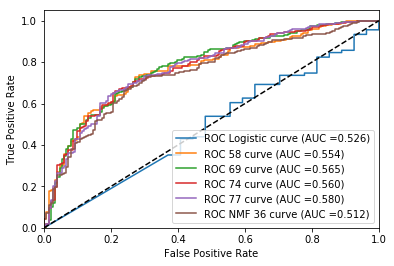

In [16]:
plt.figure()
roc_curveplot('Logistic',model,survived_test,patients_test,logit_roc_auc)
for resul in nmfResult : 
    roc_curveplot(resul['name'],resul['model'],survived,resul['patients'],resul['roc_auc'])
roc_curveplot('NMF '+str(bestScore),modelnmf,survived,pat_testnmf,nmf_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()